<h1>Gisette Dataset (MNIST digits 4 and 9) 👽<h1>

<p> El conjunto de datos Gisette (MNIST digits 4 and 9) es una variante específica del conjunto de datos Gisette que se centra en la clasificación binaria de dígitos escritos a mano del conjunto de datos MNIST. A diferencia del conjunto de datos Gisette estándar, que involucra la clasificación de células cancerosas y no cancerosas, esta variante se enfoca en los dígitos 4 y 9 del conjunto de datos MNIST.

El objetivo de este conjunto de datos es entrenar un modelo de clasificación binaria que pueda distinguir entre los dígitos 4 y 9 basándose en las características extraídas de las imágenes. Es decir, el modelo debe aprender a clasificar si una imagen contiene un 4 o un 9.

Este dataset representa un problema de clasificacion debido a que se quiere clasicificar imagenes de digitos escritos a mano en este caso el 4 y el 9.
</p>

<p>Objetivos especificos</p>

<ul>  
  <li> Implementar los modelos de aprendizaje de máquina: árboles de decisión,random forest, redes neunales y redes neuronales profundas.</li>
  <li> Realizar análisis y pruebas con el dataset suministrado de Kaggle.</li>
  <li> Aplicar ténicas de procesamiento al conjunto de datos.</li>

</ul>

<p>Intalamos la libreria de scikeras en nuestro servidor porque nos va servir para crear el objeto KerasClassifier en nuestros modelos de machine learning</p>

In [ ]:
!pip install scikeras

<p> Procedemos a importar aquellas librerias que vamos a usar durante todo el proyecto y tambien aquellas libreriasque nos van a servir para los warnings cuando usemos GridSearch</p>

In [ ]:
#Acceso al drive
from google.colab import drive

#Manipulacion de datos
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pickle
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import random

#Manejo del tiempo
import time

#Reduccion de caracteristicas con PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

#Accuracy
from sklearn.metrics import accuracy_score


#kvacinos-mas-cercanos
from sklearn.neighbors import KNeighborsRegressor

#Entrenamiento de ML
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
import keras
from keras import layers
from scikeras.wrappers import KerasClassifier
from keras import regularizers




#Manejo de warnings
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

<p>Conectamos nuestro note book con nuestro Drive de google ya que ahi tenemos nuestro archivo que contiene el data set</p>

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<p>Establecemos la ruta, si quieren experimentar con nuestro notebook solo tendrian que subir el archivo gisette.pickle ( que pueden obtenerlo de la pagina de gisette https://www.kaggle.com/datasets/fedesoriano/gisette-dataset-mnist-digits-4-and-9) a su drive y dejar la ruta ya establecida o cambiarla</p>

In [ ]:
file_path = '/content/drive/My Drive/ProyectoCienciaDeDatos/gisette.pickle'

<p>Procedemos a descomprimir el archivo ya que se encuentra en .pickle usando de la libreria pandas read_pickle</p>

In [ ]:
gisette_data=pd.read_pickle(file_path, compression='infer')

<p>vamos a imprimir como se ve nuestro gissete_data, podemos observar tal cual como dice la documentacion tenemos 3 conjuntos entrenamiento, validacon y prueba y a excepcion de los conjunto de entrenamiento los demas tienen sus respectivas etiquetas en este caso "labels"</p>

In [ ]:
print(gisette_data)

{'training': {'data': array([[550.,   0., 495., ...,   0.,   0., 983.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0., 991., ...,   0.,   0., 991.]]), 'labels': array([ 1., -1.,  1., ..., -1., -1., -1.])}, 'validation': {'data': array([[688.,   0.,   0., ...,   0., 769.,   0.],
       [778., 758.,   0., ...,   0.,   0.,   0.],
       [469.,   0., 816., ..., 417.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0., 742.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]]), 'labels': array([ 1.,  1., -1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,  1., -1.,
        1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1.,
        1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1.,
       -1.,  1., -1.,  1.,  1., -1., -1.,  1.,

<hr>  </hr>

<h1> <strong> EXPLORACION DE LOS DATOS</strong> 👓  </h1>

<p> El dataset consta de tres conjuntos: entrenamiento, validación y prueba con 6000, 1000 y 6500 observaciones respectivamente. El conjunto de datos incluye un total de 5000 características, 2500 de ellas sin poder predictivo. El orden de las características y patrones fue aleatorio. La tarea consiste en construir un algoritmo de aprendizaje automático que también sea capaz de seleccionar las funciones adecuadas.</p>

<p>Los datos no estan limpios por lo tanto se procede a limpiarlos y darles el formato correcto </p>

<p> cuando etiqueta =1 indica el dígito '4', etiqueta =-1 indica el dígito '9'</p>

<p>Los datos estan en formato de diccionario por lo tanto procedemos a extraer los datos primero para que asi esten en el formato correcto para su respectivo analisis  </p>

<p>guardamos nuestros datos en un variale llamada "data" simplementa para comodidad</p>

In [ ]:
data = gisette_data

<h4>Explicacion de variables principales</h4>

<ul>  
  <li> <strong>training_data:</strong>Esta variable contiene el conjunto de nuestros datos de entrenamiento, esta es la variable que usaremos para entrenar los modelos de ML ademas de aplicarle un metodo de reduccion de caracteristicas, basicamente es la que mas vamos a manipular</li>
  <li><strong>validation_data:</strong>Esta variable contiene el conjunto de datos que usaremos para validar nuestros modelos de aprendizaje automatico</li>
  <li><strong>testing_data:</strong>Esta variable contiene el conjunto de datos que se supone que seran usados para hacer los testing de nuestros modelos de aprendizaje automatico</li>
  <li><strong>training_labels:</strong>Esta variable contiene las etiquetas que corresponden a nuestro conjunto de datos de entrenamiento</li>
  <li><strong>validation_labels:</strong>Esta variable contiene las etiquetas que corresponden a nuestro conjunto de datos de validacion</li>
</ul>

<p><strong>Nota aclaratoria:</strong> Aunque testing_data es nuestro conjunto para hacer pruebas pasaremos de su uso ya que no contamos con etiquetas para ese data frame</p>

In [ ]:
training_data = pd.DataFrame(data['training']['data'])
validation_data = pd.DataFrame(data['validation']['data'])
testing_data = pd.DataFrame(data['testing']['data'])

training_labels = pd.Series(data['training']['labels'])
validation_labels = pd.Series(data['validation']['labels'])




validation_index = range(len(training_data), \
                         len(training_data)+len(validation_data))

testing_index = range(len(training_data)+len(validation_data), \
                   len(training_data)+len(validation_data)+len(testing_data))

<h4> <strong>IMPORTANTE</strong> Para una mejor compresion vamos a manipular los valores de las series que contienen nuestras etiquetas, ahora 1 sera el valor para 4 y 0 el valor para 9</h4>

<p>Este es el bloque de codigo para hacer el reemplazo mencionado</p>

In [ ]:
training_labels = training_labels.replace({1.0:1.0,-1.0:0.0})
validation_labels = validation_labels.replace({1.0:1.0,-1.0:0.0})

<p>Imprimimos para ver que tal se ven</p>

In [ ]:
print(training_labels)

0       1.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
5995    0.0
5996    1.0
5997    0.0
5998    0.0
5999    0.0
Length: 6000, dtype: float64


In [ ]:
print(validation_labels)

0      1.0
1      1.0
2      0.0
3      1.0
4      1.0
      ... 
995    0.0
996    1.0
997    1.0
998    0.0
999    0.0
Length: 1000, dtype: float64


In [ ]:
aux=training_data

<p>Veamos como se nuestro conjunto de datos de entrenamiento con las respectivas etiquetas esto lo hacemos mediante una variable aux</p>

In [ ]:
aux["numero"]= training_labels
aux

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,numero
0,550.0,0.0,495.0,0.0,0.0,0.0,0.0,976.0,0.0,0.0,...,0.0,0.0,991.0,991.0,0.0,0.0,0.0,0.0,983.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,976.0,0.0,0.0,...,475.0,0.0,991.0,0.0,0.0,991.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,742.0,0.0,0.0,0.0,0.0,684.0,0.0,956.0,...,0.0,0.0,0.0,0.0,0.0,674.0,0.0,0.0,838.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,608.0,0.0,979.0,...,0.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,783.0,0.0,0.0,0.0,0.0
5996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,921.0,0.0,886.0,0.0,1.0
5997,0.0,0.0,0.0,0.0,0.0,758.0,0.0,0.0,0.0,522.0,...,901.0,0.0,0.0,0.0,0.0,980.0,0.0,0.0,0.0,0.0
5998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,690.0,0.0,0.0,0.0,0.0,0.0,0.0


<p>Observamos si los datos se encuentran balanceados y en efecto se encuentran ya balanceados por lo tanto no hay que hacer algun proceso para balancearlos</p>

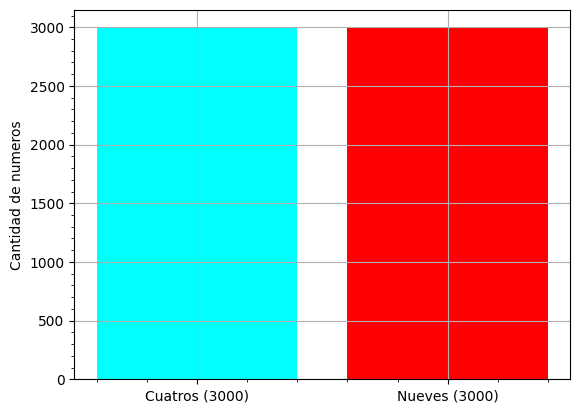

In [ ]:
cantidad_cuatro= aux[aux["numero"]==1][0].size
cantidad_nueve = aux[aux["numero"]==0][0].size
plt.bar(["Cuatros (%d)"%cantidad_cuatro, "Nueves (%d)" % cantidad_nueve],
       [cantidad_cuatro,cantidad_nueve],
       color=["cyan","red"],
       width=0.8)
plt.ylabel("Cantidad de numeros")
plt.grid()
plt.minorticks_on()
plt.show()

<p>En la grafica podemos observar que la cantidad de cuatros (4) y nueves (9) es la misma 3000 para cada numero, tal cual lo dice la documentacion, en total tenemos 6000 instancias</p>

<p>Ahora vamos a ver que tanto se relacionan con la variable objetivo nuesrtas variables X con el siguiente codigo</p>

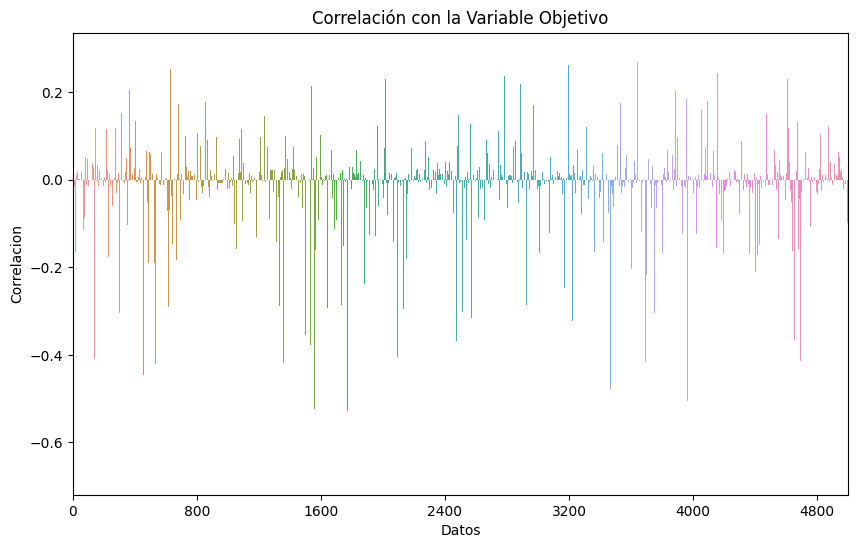

In [ ]:
corr_matrix = aux.corr()

correlation_with_target = corr_matrix['numero'].drop('numero')

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.title("Correlación con la Variable Objetivo")
plt.xlabel("Datos")
plt.ylabel("Correlacion")
plt.xticks(np.arange(0, 5001, 800))
plt.show()

<p>A partir del grafico de correlacion con respecto a la variable objetivo podemos observas que hay una gran diferencia entre nuestras variables.

La altura de las varibles indica la correlacion, hay tanto positivas como negativas y muy cercanas a cero, las barras con altura positiva nos indica una correlacion muy fuerte con la variable objetvo, caso contrario con las que tienen altura negativa que nos indica una correlacion muy debil y aquellas cercanas  a cero directamente nos dice que no existe correlacion alguna, esto lo podremos confirmar con un mapa de calor

</p>

<p>Para hacer el mapa de calor debemos extraer de nuesra varible aux la matriz de correlacion</p>

In [ ]:
#aux = aux.drop(["numero"], axis=1)
corr_matrix2 = aux.corr()

<p>Ahora pintamos el mapa de calor usando la libreria MatPLotLib que es la que nos sirve para hacer graficas con nuestro datos</p>

<Figure size 1000x600 with 0 Axes>

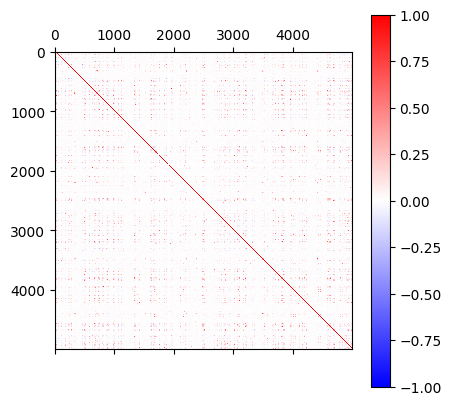

In [ ]:
plt.figure(figsize=(10, 6))
plt.matshow(corr_matrix2, vmin=-1, vmax=1, cmap="bwr")
plt.colorbar()
plt.show()

<p>En nuestro mapa de calor se confirma lo anterior en el grafico de correlacion, ahora tenemos un mejor panorama del comportamiento de nuestros datos en el data set, hay muchos datos que no nos proporcionan la informacion necesaria para nuestro proyecto</p>

<p> Ahora tenemos que pensar en algo, segun la documentacion y las buenas praticas de datos, el conjunto de entrenamiento debe ser el conjunto con mas instacias para que asi nuestros modelos realicen una buena generalizacion pero vamos a observar cuantas instancias tiene </P>

In [ ]:
training_data

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,numero
0,550.0,0.0,495.0,0.0,0.0,0.0,0.0,976.0,0.0,0.0,...,0.0,0.0,991.0,991.0,0.0,0.0,0.0,0.0,983.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,976.0,0.0,0.0,...,475.0,0.0,991.0,0.0,0.0,991.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,742.0,0.0,0.0,0.0,0.0,684.0,0.0,956.0,...,0.0,0.0,0.0,0.0,0.0,674.0,0.0,0.0,838.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,608.0,0.0,979.0,...,0.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,783.0,0.0,0.0,0.0,0.0
5996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,921.0,0.0,886.0,0.0,1.0
5997,0.0,0.0,0.0,0.0,0.0,758.0,0.0,0.0,0.0,522.0,...,901.0,0.0,0.0,0.0,0.0,980.0,0.0,0.0,0.0,0.0
5998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,690.0,0.0,0.0,0.0,0.0,0.0,0.0


<p>Posee una 6000 filas vamos a revisar cuantas tiene nuestros conjunto de validacion y prueba </p>

In [ ]:
validation_data

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,688.0,0.0,0.0,0.0,0.0,0.0,0.0,952.0,0.0,870.0,...,0.0,0.0,0.0,0.0,0.0,0.0,494.0,0.0,769.0,0.0
1,778.0,758.0,0.0,0.0,0.0,0.0,0.0,708.0,0.0,991.0,...,0.0,0.0,0.0,770.0,0.0,0.0,0.0,0.0,0.0,0.0
2,469.0,0.0,816.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,467.0,0.0,0.0,0.0,417.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,571.0,991.0,983.0,0.0,983.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,949.0,0.0,991.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,976.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,511.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,991.0,0.0,0.0,852.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,599.0,0.0,0.0,0.0,0.0,910.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,707.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,742.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,968.0,0.0,0.0,...,0.0,0.0,0.0,773.0,0.0,0.0,0.0,0.0,0.0,0.0


<p>Tiene una 1000 filas, eso esta bastante bien despues de todo es solo el conjunto de validacion</p>

In [ ]:
testing_data

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,983.0,0.0,956.0,0.0,0.0,0.0,0.0,520.0,0.0,0.0,...,0.0,0.0,0.0,968.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,695.0,...,960.0,0.0,0.0,687.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,703.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,758.0,0.0,0.0,983.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,987.0,0.0,0.0,0.0,0.0,0.0,498.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,980.0,0.0,976.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,773.0,0.0,0.0,...,0.0,921.0,0.0,538.0,831.0,0.0,976.0,0.0,769.0,0.0
6496,712.0,0.0,0.0,0.0,0.0,0.0,0.0,976.0,0.0,0.0,...,0.0,0.0,0.0,0.0,987.0,0.0,0.0,0.0,0.0,906.0
6497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,983.0,...,0.0,0.0,0.0,812.0,0.0,0.0,0.0,0.0,0.0,0.0
6498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,995.0,0.0,0.0,508.0,0.0,0.0,0.0,0.0,991.0,0.0


<p>Nuestro conjunto de datos de prueba tiene unas 6500 filas, eso vamos a cambiarlo ya que es el conjunto de datos de entrenamiento el que debe tener mas, vamos a pasar 500 filas del data frame "testing_data" al data frame "training_data" para que asi el conjunto de datos de prueba tenga mas datos</p>

In [ ]:
training_data=pd.concat([training_data, testing_data.sample(n=500)])

In [ ]:
training_data.sort_index()

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,numero
0,550.0,0.0,495.0,0.0,0.0,0.0,0.0,976.0,0.0,0.0,...,0.0,0.0,991.0,991.0,0.0,0.0,0.0,0.0,983.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,976.0,0.0,0.0,...,475.0,0.0,991.0,0.0,0.0,991.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,742.0,0.0,0.0,0.0,0.0,684.0,0.0,956.0,...,0.0,0.0,0.0,0.0,0.0,674.0,0.0,0.0,838.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,608.0,0.0,979.0,...,0.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,991.0,0.0,0.0,...,0.0,0.0,753.0,0.0,0.0,734.0,0.0,0.0,0.0,NaN
6473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,976.0,0.0,0.0,...,0.0,0.0,983.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
6475,0.0,0.0,976.0,0.0,0.0,0.0,0.0,991.0,0.0,556.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,475.0,NaN
6480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,983.0,0.0,983.0,...,0.0,0.0,0.0,987.0,0.0,983.0,0.0,0.0,976.0,NaN


<p>Despues de hacer eso nos damos cuenta que nuestra variable a predecir tiene valos nulos, tenemos que encargarnos de esos, extraemos nuestra variable a predecir usando la libreria de pandas con "pd.Series"</p>

In [ ]:
etiquetas = pd.Series(training_data["numero"])

In [ ]:
#Oranizamos el indece forma ascendente
etiquetas = etiquetas.sort_index()
print(etiquetas)

0       1.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
6471    NaN
6473    NaN
6475    NaN
6480    NaN
6484    NaN
Name: numero, Length: 6500, dtype: float64


<p> Usando la libreria de "random", vamos a generar de forma aleatoria un 1.0 o un 0.0 con el fin de rellenar los valores faltantes de nuestra series que van a reresentar las etiquetas del conjunto de datos de entrenamiento, usamos una semilla (seed) de 42 es la que se usa por defecto  y usamos el metodo "apply", usando "random.choice" va elegir aleatoriamene entre los numeros que le hemos indicado y con un if preguntara si el valor en nan o no</p>

In [ ]:
np.random.seed(42)
etiquetas = etiquetas.apply(lambda x: random.choice([0.0, 1.0]) if pd.isna(x) else x)

In [ ]:
print(etiquetas)

0       1.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
6471    0.0
6473    1.0
6475    1.0
6480    1.0
6484    1.0
Name: numero, Length: 6500, dtype: float64


<p>Y se han llenado aletoriamente los datos faltantes,ahora nuetras nuevas etiquetas para el conjunto de datos de entrenamiento se las asignamos a nuestra variable "training_labels"</p>

In [ ]:
training_labels = etiquetas

In [ ]:
print(training_labels)

0       1.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
6471    0.0
6473    1.0
6475    1.0
6480    1.0
6484    1.0
Name: numero, Length: 6500, dtype: float64


<hr>

<h1> <strong> ESTANDARIZACION Y ESCALAMIENTO DE DATOS </strong> 📈 🔎</h1>
<p>Con el fin de disminuir el ruido, la exigencia computacional y para que posteriormente en la implementacion de los metodos de aprendizaje automatico, realizamos un proceso de estandarizacion y escalamiento</p>

In [ ]:
training_data= training_data.drop(['numero'], axis=1)

In [ ]:
datos_standard = preprocessing.RobustScaler().fit_transform(training_data)

<p> Importamos "preprocessing" de la libreria de sklearn que nos va permitir manipular los datos y realizamos un proceso de estadarizacion robusta con el fin de que la desviacion estandar sea de 1 y la media seda de 0, elegimos que sea una estandarizacion robusta para asi evitar OutLayers y el array resultante lo guardamos en datos_standard</p>

In [ ]:
datos_standard

array([[550.,   0., 495., ...,   0.,   0., 983.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0., 731., ...,   0.,   0.,   0.],
       [809.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0., 956.,   0.]])

In [ ]:
df_aux = pd.DataFrame(datos_standard)

<p>Convertimos el array que nos retorno el metodo robusto a un DataFrame</p>

In [ ]:
datos_min_max = preprocessing.MinMaxScaler().fit_transform(df_aux)

<p>Ahora que los datos han sido estandarizados vamos a escalarlos con su minimo y su maximo, para asi tener un rango entre 0 y 1 </p>

In [ ]:
df_definitivo = pd.DataFrame(datos_min_max)

<p>Convertimos el array resultando en un data frame y este es nuestro data frame difinitivo con el cual vamos a iniciar el proceso de reduccion de caracteristicas, este proceso se hizo para mantener las buenas practicas que se debe realizar en un proceso de ciencia de datos</p>

In [ ]:
df_definitivo

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.550551,0.0,0.495495,0.0,0.0,0.000000,0.000000,0.976977,0.0,0.000000,...,0.000000,0.000000,0.0,0.991992,0.991992,0.0,0.000000,0.0,0.000000,0.983984
1,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.976977,0.0,0.000000,...,0.000000,0.475475,0.0,0.991992,0.000000,0.0,0.991992,0.0,0.000000,0.000000
2,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
3,0.000000,0.0,0.742743,0.0,0.0,0.000000,0.000000,0.684685,0.0,0.956957,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.674675,0.0,0.000000,0.838839
4,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.608609,0.0,0.979980,...,0.991992,0.000000,0.0,0.828829,0.000000,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.757758,0.0,0.000000,...,0.000000,0.000000,0.0,0.983984,0.000000,0.0,0.000000,0.0,0.000000,0.000000
6496,0.000000,0.0,0.000000,0.0,0.0,0.567568,0.000000,0.591592,0.0,0.609610,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.956957,0.0,0.431431,0.000000
6497,0.000000,0.0,0.731732,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.658659,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
6498,0.809810,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000


<hr>

<h1> <strong> Reduccion de caracteristicas </strong>  ✂ </h1>

<h2>PCA</h2>

<p>PCA (Principal Component Analysis) es una técnica de reducción de dimensionalidad que se utiliza comúnmente en análisis de datos y aprendizaje automático. Su objetivo principal es reducir la cantidad de dimensiones (o variables) en un conjunto de datos mientras se conserva la mayor cantidad posible de información.

La idea fundamental detrás de PCA es transformar el conjunto de datos original en un nuevo conjunto de datos, donde las variables están descorrelacionadas y ordenadas por la cantidad de varianza que explican. Los "componentes principales" son combinaciones lineales de las variables originales y se calculan de manera que capturen la mayor varianza posible.</p>

In [ ]:
#df_definitivo=df_definitivo.drop(['Etiqueta'], axis=1)

<p>Vamos a realizar la grafica de la varianza vs las dimensiones para asi observar graficamente el comportamiento de la varianza en nuestro conjunto de datos</p>

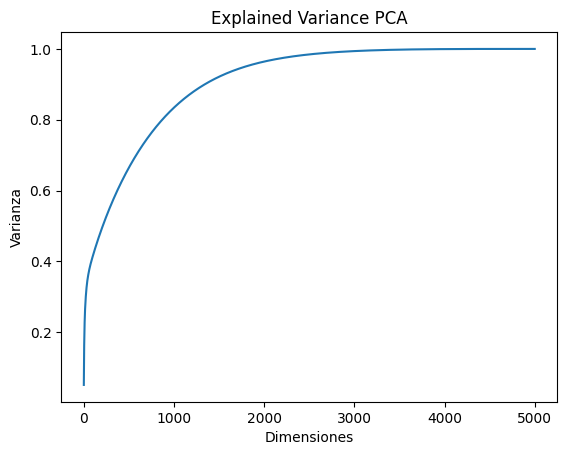

In [ ]:
pca = PCA()
train_index = range(0,len(df_definitivo))
X_train_PCA = pca.fit_transform(df_definitivo)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
plt.xlabel('Dimensiones')
plt.ylabel('Varianza')
plt.title("Explained Variance PCA")
plt.show()
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=train_index)

<p>Ahora vamos analizar dentro de un rango de componentes cual es ese punto en donde la varianza cada vez presenta cambios leves</p>

In [ ]:
importanceOfPrincipalComponents = \
    pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

print('varianza para los primeros 2000 componentes',
      importanceOfPrincipalComponents.loc[:,0:1999].sum(axis=1).values, '\n' )
print('varianza para los primeros 2400 componentes',
      importanceOfPrincipalComponents.loc[:,0:2399].sum(axis=1).values, '\n')
print('varianza para los primeros 2500 componentes',
      importanceOfPrincipalComponents.loc[:,0:2499].sum(axis=1).values, '\n')
print('varianza para los primeros 2600 componentes',
      importanceOfPrincipalComponents.loc[:,0:2599].sum(axis=1).values, '\n')
print('varianza para los primeros 2650 componentes',
      importanceOfPrincipalComponents.loc[:,0:2649].sum(axis=1).values, '\n')
print('varianza para los primeros 2680 componentes',
      importanceOfPrincipalComponents.loc[:,0:2679].sum(axis=1).values, '\n')
print('varianza para los primeros 2690 componentes',
      importanceOfPrincipalComponents.loc[:,0:2689].sum(axis=1).values, '\n')
print('varianza para los primeros 2700 componentes',
      importanceOfPrincipalComponents.loc[:,0:2699].sum(axis=1).values, '\n')
print('varianza para los primeros 2800 componentes',
      importanceOfPrincipalComponents.loc[:,0:2799].sum(axis=1).values, '\n')
print('varianza para los primeros 2900 componentes',
      importanceOfPrincipalComponents.loc[:,0:2899].sum(axis=1).values, '\n')
print('varianza para los primeros 2950 componentes',
      importanceOfPrincipalComponents.loc[:,0:2949].sum(axis=1).values, '\n')
print('varianza para los primeros 2960 componentes',
      importanceOfPrincipalComponents.loc[:,0:2959].sum(axis=1).values, '\n')
print('varianza para los primeros 2970 componentes',
      importanceOfPrincipalComponents.loc[:,0:2969].sum(axis=1).values, '\n')
print('varianza para los primeros 2980 componentes',
      importanceOfPrincipalComponents.loc[:,0:2979].sum(axis=1).values, '\n')
print('varianza para los primeros 2990 componentes',
      importanceOfPrincipalComponents.loc[:,0:2989].sum(axis=1).values, '\n')
print('varianza para los primeros 3000 componentes',
      importanceOfPrincipalComponents.loc[:,0:2999].sum(axis=1).values, '\n')
print('varianza para los primeros 3100 componentes',
      importanceOfPrincipalComponents.loc[:,0:3099].sum(axis=1).values, '\n')
print('varianza para los primeros 3400 componentes',
      importanceOfPrincipalComponents.loc[:,0:3399].sum(axis=1).values, '\n')
print('varianza para los primeros 3500 componentes',
      importanceOfPrincipalComponents.loc[:,0:3499].sum(axis=1).values, '\n')
print('varianza para los primeros 3600 componentes',
      importanceOfPrincipalComponents.loc[:,0:3599].sum(axis=1).values, '\n')
print('varianza para los primeros 3800 componentes',
      importanceOfPrincipalComponents.loc[:,0:3799].sum(axis=1).values, '\n')
print('varianza para los primeros 4000 componentes',
      importanceOfPrincipalComponents.loc[:,0:3999].sum(axis=1).values, '\n')

varianza para los primeros 2000 componentes [0.96611271] 

varianza para los primeros 2400 componentes [0.98282786] 

varianza para los primeros 2500 componentes [0.98562274] 

varianza para los primeros 2600 componentes [0.98801044] 

varianza para los primeros 2650 componentes [0.9890685] 

varianza para los primeros 2680 componentes [0.9896637] 

varianza para los primeros 2690 componentes [0.98985574] 

varianza para los primeros 2700 componentes [0.99004496] 

varianza para los primeros 2800 componentes [0.9917766] 

varianza para los primeros 2900 componentes [0.99324134] 

varianza para los primeros 2950 componentes [0.99388721] 

varianza para los primeros 2960 componentes [0.99400973] 

varianza para los primeros 2970 componentes [0.99413026] 

varianza para los primeros 2980 componentes [0.99424876] 

varianza para los primeros 2990 componentes [0.99436511] 

varianza para los primeros 3000 componentes [0.99447953] 

varianza para los primeros 3100 componentes [0.99552133] 



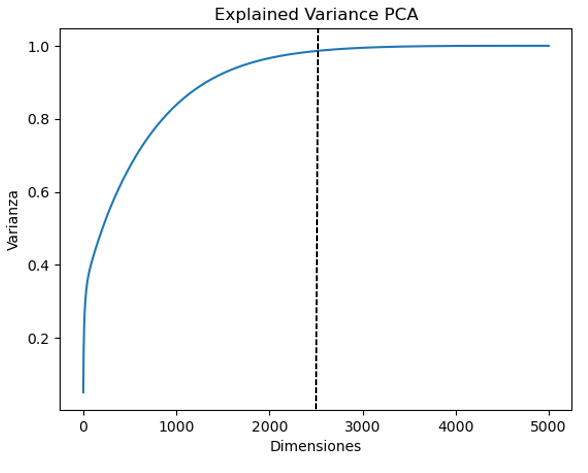

<p>Gracias al calculo y a la grafica podemos observar que despues de los 2400 componentes los cambios en la varianza son cada vez mas leves por lo tanto decidimos que para reducir la dimensionalidad de nuestro datos nos vamos a quedar con 2400 componentes y hacer el respectivo proceso de ML.
<p>
    <strong>varianza para los primeros 2400 componentes [0.98282786]  </strong>

<p>Procedemos a realizar el proceso de reduccion de caracteristicas usando la libreria de sklearn y su componente decomposition e importamos KernelPCA, usando como numero de componentes 2400
</p>

In [ ]:


n_components = 2400
kernel = 'rbf'

kernelPCA = KernelPCA(n_components=n_components, kernel=kernel)

kernelPCA.fit(X_train_PCA)
X_train_kernelPCA = kernelPCA.transform(X_train_PCA)
X_train_kernelPCA = pd.DataFrame(data=X_train_kernelPCA,index=train_index)



In [ ]:
X_train_kernelPCA

,0,1,2,3,4,5,6,7,8,9,...,2390,2391,2392,2393,2394,2395,2396,2397,2398,2399
0,0.193559,0.050992,0.124069,0.149860,0.016470,-0.022707,0.039205,0.053459,-0.050168,0.072176,...,0.001047,0.004812,-0.000938,0.005703,-0.006320,0.001537,-0.000303,0.004613,-0.004205,-0.003436
1,0.096408,-0.100270,-0.077604,-0.043529,0.008684,0.012192,-0.006979,0.090012,0.002360,0.021790,...,0.004953,0.000981,0.000249,0.001204,0.000173,0.002641,0.000696,-0.002736,0.000705,0.000375
2,0.034165,-0.109714,-0.040642,0.047759,0.070520,-0.023570,0.013540,-0.036355,0.021794,0.043021,...,-0.001373,0.005024,0.000585,0.002637,-0.002974,-0.000673,-0.000940,0.000694,0.001280,0.002026
3,0.076140,-0.013391,0.001979,-0.048652,0.055139,-0.084289,-0.019858,0.053259,-0.028647,0.001946,...,0.000209,0.002640,-0.003354,0.003059,0.001513,-0.004267,-0.001774,0.001341,0.001902,-0.001031
4,-0.100012,0.009802,0.014222,-0.004802,-0.020465,0.012918,-0.015009,-0.030594,-0.020056,-0.017716,...,-0.004662,-0.001452,-0.002715,0.000565,-0.002609,-0.001229,0.001395,0.001910,0.000215,-0.003325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,0.004461,-0.018637,-0.038189,-0.057278,-0.050197,-0.086534,-0.021666,0.042531,0.020725,0.035257,...,-0.000730,-0.000284,0.001464,0.001087,-0.001379,-0.001266,0.004055,-0.000146,-0.000142,0.001200
6496,0.101843,-0.017576,-0.085101,-0.017752,-0.018190,0.045040,0.028004,-0.001084,-0.103518,-0.048665,...,0.001511,0.001648,0.000755,0.001715,-0.002027,0.003590,0.003008,-0.003675,0.000674,-0.001861
6497,0.053952,0.050456,-0.123149,-0.045552,0.022847,0.065067,0.057868,0.017347,-0.057257,-0.047133,...,-0.000081,0.000171,0.000389,-0.004306,-0.001611,-0.001074,-0.003983,0.000969,-0.000194,0.002659
6498,-0.072606,-0.030349,-0.017420,0.014494,-0.031516,-0.026892,0.028796,-0.005910,-0.006841,0.014430,...,-0.001380,0.002829,0.003548,-0.002141,0.001806,-0.004811,0.003057,-0.004437,0.000770,0.000940


<p>Podemos observar como el numero de columnas ha disminuido, pasando de 5000 a 2500 pero manteniendo la mayor cantidad de informacion relevante posible</p>

<p>Procedemos a transformar los data frames de validacion y testing</p>

In [ ]:
X_validation_kernelPCA = kernelPCA.transform(validation_data)
X_validation_kernelPCA = \
    pd.DataFrame(data=X_validation_kernelPCA, index=validation_index)

In [ ]:
X_validation_kernelPCA

,0,1,2,3,4,5,6,7,8,9,...,2390,2391,2392,2393,2394,2395,2396,2397,2398,2399
6000,0.107736,0.053539,0.022088,0.034324,0.098363,0.069254,0.061784,0.072609,-0.00941,0.072094,...,-0.017331,-0.00821,0.000824,-0.00461,-0.009182,-0.002358,0.006611,0.012592,0.003078,-0.003307
6001,0.107736,0.053539,0.022088,0.034324,0.098363,0.069254,0.061784,0.072609,-0.00941,0.072094,...,-0.017331,-0.00821,0.000824,-0.00461,-0.009182,-0.002358,0.006611,0.012592,0.003078,-0.003307
6002,0.107736,0.053539,0.022088,0.034324,0.098363,0.069254,0.061784,0.072609,-0.00941,0.072094,...,-0.017331,-0.00821,0.000824,-0.00461,-0.009182,-0.002358,0.006611,0.012592,0.003078,-0.003307
6003,0.107736,0.053539,0.022088,0.034324,0.098363,0.069254,0.061784,0.072609,-0.00941,0.072094,...,-0.017331,-0.00821,0.000824,-0.00461,-0.009182,-0.002358,0.006611,0.012592,0.003078,-0.003307
6004,0.107736,0.053539,0.022088,0.034324,0.098363,0.069254,0.061784,0.072609,-0.00941,0.072094,...,-0.017331,-0.00821,0.000824,-0.00461,-0.009182,-0.002358,0.006611,0.012592,0.003078,-0.003307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0.107736,0.053539,0.022088,0.034324,0.098363,0.069254,0.061784,0.072609,-0.00941,0.072094,...,-0.017331,-0.00821,0.000824,-0.00461,-0.009182,-0.002358,0.006611,0.012592,0.003078,-0.003307
6996,0.107736,0.053539,0.022088,0.034324,0.098363,0.069254,0.061784,0.072609,-0.00941,0.072094,...,-0.017331,-0.00821,0.000824,-0.00461,-0.009182,-0.002358,0.006611,0.012592,0.003078,-0.003307
6997,0.107736,0.053539,0.022088,0.034324,0.098363,0.069254,0.061784,0.072609,-0.00941,0.072094,...,-0.017331,-0.00821,0.000824,-0.00461,-0.009182,-0.002358,0.006611,0.012592,0.003078,-0.003307
6998,0.107736,0.053539,0.022088,0.034324,0.098363,0.069254,0.061784,0.072609,-0.00941,0.072094,...,-0.017331,-0.00821,0.000824,-0.00461,-0.009182,-0.002358,0.006611,0.012592,0.003078,-0.003307


In [ ]:
X_testing_kernelPCA = kernelPCA.transform(testing_data)
X_testing_kernelPCA = \
    pd.DataFrame(data=X_testing_kernelPCA, index=testing_index)

<p>Cambiamos el nombre de nuestros data frames para que sean mas facil de entender</p>

In [ ]:
df_train=X_train_kernelPCA
df_testing = X_testing_kernelPCA
df_validation= X_validation_kernelPCA

<p>Despues de haber hecho el arduo trabajo de estandarizar, escalar y reducir las caracteristicas de nuestro data set ya podemos iniciar el proceso de implementar metodos de aprendizaje automatico los cuale seran:</p>
 <ul>
        <li> Arboles de decision</li>
        <li> Random Forest</li>
        <li> Redes neuronales</li>
        <li> Aprendizaje profundo</li>
 </ul>

<hr>

<h1> <strong>  ML MODEL </strong> 🤖</h1>

<p>A continuacion vamos a empezar con la aplicacion de los modelos de machine learning, para hacer el entrenamiento de los mismos para la clasificacion de los conjuntos de datos.  </p>

<h3> <strong> Arbol de decision </strong> 🌳</h3>

<h4>Prueba con parametros con defecto</h4>

In [ ]:


arbol = tree.DecisionTreeClassifier(criterion = "entropy", splitter='best')

arbol_decision=arbol.fit(df_train,training_labels)

y_pred_validation = arbol_decision.predict(df_validation)
y_pred_training = arbol_decision.predict(df_train)

dt_precision_initial_validation = 100 * accuracy_score(y_pred_validation,validation_labels )

print('Precisión inicial de validacion: {0:.3f}%'.format(dt_precision_initial_validation))


dt_precision_initial_train = 100 * accuracy_score(y_pred_training,training_labels )
print('Precisión inicial de entrenamiento: {0:.3f}%'.format(dt_precision_initial_train))

Precisión inicial de validacion: 50.000%
Precisión inicial de entrenamiento: 100.000%


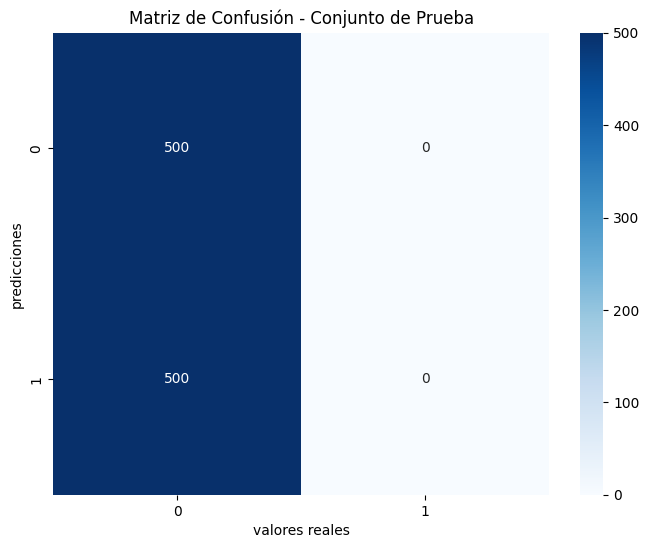

In [ ]:
# Crear la matriz de confusión para el conjunto de validacion
cm_test = confusion_matrix(validation_labels,y_pred_validation)

# Crear el mapa de calor para el conjunto de validacion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, cmap="Blues",fmt='d')
plt.title("Matriz de Confusión - Conjunto de Prueba")
plt.xlabel("valores reales")
plt.ylabel("predicciones")
plt.show()

<p>Podemos observar que hay un problema de sobre ajuste (overfitting) ya que nuestro modelo se esta ajustando mucho a nuestro datos que prueba y cuando lo ponemos a prueba con datos diferentes vemos que solo acerta en un 50% ¿Que esta pasando con el otro 50%? eso lo podemos ver en la matriz de confusion</p>

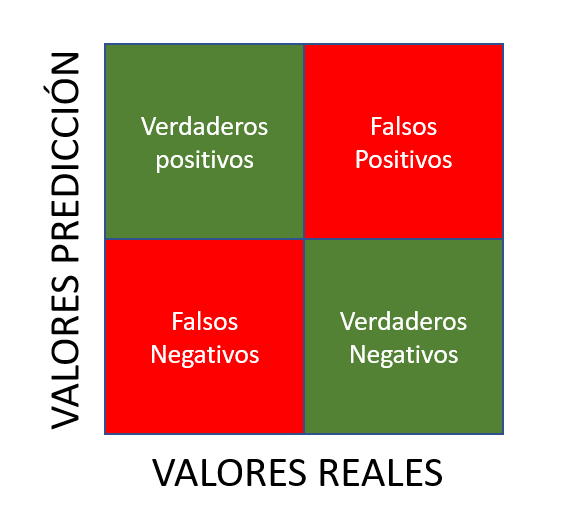

<p>Lo que esta pasando con nuestro modelo de arbol de decision es que un 50% son verdaderos positivos, esos estan bien pero el otro 50% son falsos positivos, eso quiere decir que hay 500 datos entre nueves(9) o cuatros(4) en donde nuestro modelo no logra identificarlos correctamente, vamos a realizar una segunda prueba usando la libreria de GridSearch </p>

<hr>

<h4>Prubea 2 usando GridSearch</h4>

In [ ]:
model = DecisionTreeClassifier(
    criterion='gini',max_depth=10,splitter='best'
)

<p> Se crea una instancia de DecisionTreeClassifier. Los parámetros especificados son:
<ul> <li> <strong> criterion:</strong> Criterio para medir la calidad de una división. En este caso, se utiliza el índice Gini ('gini'), que es común para problemas de clasificación.</li>
<li> <strong> max_depth: </strong> La profundidad máxima del árbol. Aquí, se limita a 10 niveles para evitar un sobreajuste.</li>
<li> <strong>splitter: </strong> Estrategia utilizada para elegir la división en cada nodo. 'best' selecciona la mejor división. </li></ul>
 </p>

In [ ]:

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [30, 50, 100,250,500],
    'min_samples_split': [25,40, 80, 120],
    'min_samples_leaf': [40, 20, 150,300],
    'max_features': ['auto', 'sqrt', 'log2', 250]
}



<p>Se define un espacio de hiperparámetros para realizar la búsqueda en rejilla. Esto incluye diferentes opciones para criterio, profundidad máxima, número mínimo de muestras requeridas para dividir un nodo, número mínimo de muestras requeridas en una hoja y las características máximas a considerar para la división.

<ul>

 <li> <strong>criterion:  </strong> Especifica la función para medir la calidad de una división. En un árbol de decisión, esto puede ser 'gini' para el índice Gini o 'entropy' para la ganancia de información. </li>
 <li> <strong>max_depth: </strong> La profundidad máxima del árbol. Controla la cantidad máxima de niveles en el árbol.
 </li>
 <li> <strong> min_samples_split: </strong> El número mínimo de muestras requeridas para dividir un nodo interno. Si el número de muestras en un nodo es menor que este valor, no se realiza la división. </li>
 <li> <strong>min_samples_leaf: </strong> El número mínimo de muestras requeridas para estar en un nodo hoja. Garantiza que cada hoja tenga al menos este número de muestras. </li>
 <li> <strong> max_features: </strong>  El número máximo de características que se deben considerar al buscar la mejor división.</li>



</ul>

para cada hiper parametro se va usar un vecto de posibles opciones
</p>

In [ ]:
grid_model_dt = GridSearchCV(
    estimator=model,
    param_grid = param_grid,
    error_score="raise",
    refit=True,
    n_jobs=-1,
    cv=5,
)

<p> Se crea una instancia de GridSearchCV, que realiza una búsqueda en rejilla sobre el espacio de hiperparámetros especificado. Algunos parámetros clave son:

<ul>  
 <li> <strong>estimator:</strong> El modelo sobre el cual se realiza la búsqueda en rejilla. </li>
 <li>  <strong> param_grid: </strong> El espacio de hiperparámetros a explorar. </li>
 <li> <strong> error_score: </strong> Controla qué hacer si ocurre un error durante la evaluación de un conjunto particular de hiperparámetros. </li>
 <li>  <strong>refit:</strong> Si es True, ajusta el modelo con los mejores hiperparámetros encontrados. </li>
 <li>  <strong>n_jobs:</strong> Número de trabajadores para realizar la búsqueda en paralelo (aquí, se utiliza -1 para utilizar todos los núcleos disponibles).</li>
 <li> <strong>cv:</strong> Número de divisiones para la validación cruzada (en este caso, 5 divisiones). </li>

</ul>
</p>

In [ ]:
grid_model_dt.fit(df_train, training_labels)

GridSearchCV(cv=5, error_score='raise',
             estimator=DecisionTreeClassifier(max_depth=10), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [30, 50, 100, 250, 500],
                         'max_features': ['auto', 'sqrt', 'log2', 250],
                         'min_samples_leaf': [40, 20, 150, 300],
                         'min_samples_split': [25, 40, 80, 120]})

<p> <strong>grid_model_dt.fit(df_train, training_labels)</strong> lleva a cabo el proceso de entrenamiento del modelo de árbol de decisión con los hiperparámetros especificados en param_grid en el conjunto de datos de entrenamiento (df_train) y las etiquetas correspondientes (training_labels). Durante el proceso de búsqueda en rejilla, se explorarán diferentes combinaciones de hiperparámetros, y se seleccionará la combinación que optimiza el rendimiento del modelo en función de la métrica especificada. Después de este proceso, grid_model_dt contendrá información sobre el mejor modelo encontrado, incluyendo los mejores hiperparámetros y otros detalles.</p>

<p>Una vez que el modelo se ajusta con la búsqueda en rejilla, podemos acceder a los mejores hiperparámetros y al mejor modelo mediante el atributo best_params_ y best_estimator_, respectivamente, de grid_model_dt.</p>

In [ ]:
grid_model_dt.best_params_

{'criterion': 'gini',
 'max_depth': 250,
 'max_features': 'auto',
 'min_samples_leaf': 20,
 'min_samples_split': 80}

<p>Creamos un nuevo arbol de decision con el mejor modeloque nos proporciono la libreriade GridSearch</p>

In [ ]:
arbol = tree.DecisionTreeClassifier( criterion ='gini',
 max_depth= 250,
 max_features= 'auto',
 min_samples_leaf= 20,
 min_samples_split= 80)

arbol_decision=arbol.fit(df_train,training_labels)

y_pred_validation = arbol_decision.predict(df_validation)
y_pred_training = arbol_decision.predict(df_train)

dt_precision_initial_validation = 100 * accuracy_score(y_pred_validation,validation_labels )

print('Precisión  de validacion: {0:.3f}%'.format(dt_precision_initial_validation))


dt_precision_initial_train = 100 * accuracy_score(y_pred_training,training_labels )
print('Precisión  de entrenamiento: {0:.3f}%'.format(dt_precision_initial_train))

Precisión inicial de validacion: 50.000%
Precisión inicial de entrenamiento: 71.231%


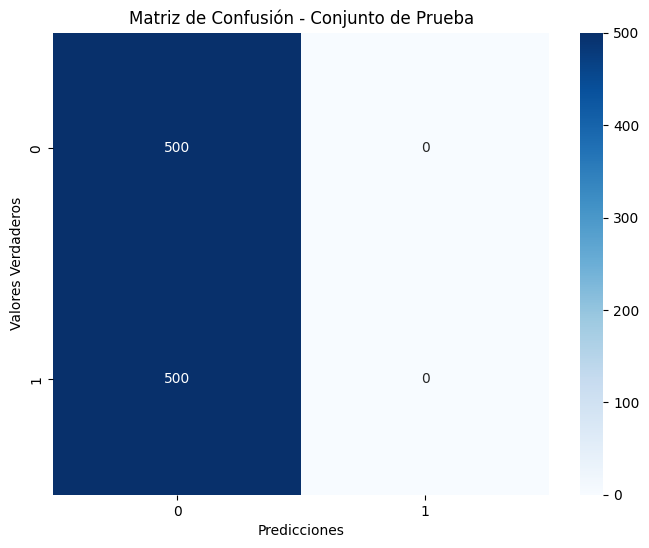

In [ ]:
# Crear la matriz de confusión para el conjunto de validacion
cm_test = confusion_matrix(validation_labels,y_pred_validation)

# Crear el mapa de calor para el conjunto de validacion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, cmap="Blues",fmt='d')
plt.title("Matriz de Confusión - Conjunto de Prueba")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")
plt.show()

<p>Podemos observar como a pesar de usar GridSearch y manipular los valores de los hiper parametros sigue siendo presente el problema del sobre ajuste</p>

<hr>

<h3> <strong> RANDOM FOREST</strong> 🌲 🌳 🌴</h3>

<h4>Prueba con parametros por defecto</h4>

In [ ]:

#Indicamos que el numero de arboles que conformaran nuestro primer bosque es igual a 100
bosque = RandomForestClassifier(n_estimators=100)
#Entrenamos nuestro bosque
bosque.fit(df_train.values,training_labels.values)

y_pred_validation = bosque.predict(df_validation)

y_pred_train = bosque.predict(df_train)
#Evaluamos con los datos de entrenamiento y validacion

validation_accuracy = accuracy_score(y_pred_validation,validation_labels ) * 100

train_accuracy = accuracy_score(y_pred_train,training_labels ) *100

print("Precisión con el conjunto de validacion:", "{:.3f}%".format(validation_accuracy))
print("Precisión del entrenamiento :", "{:.3f}%".format(train_accuracy))

Precisión con el conjunto de validacion: 50.000%
Precisión del entrenamiento : 100.000%


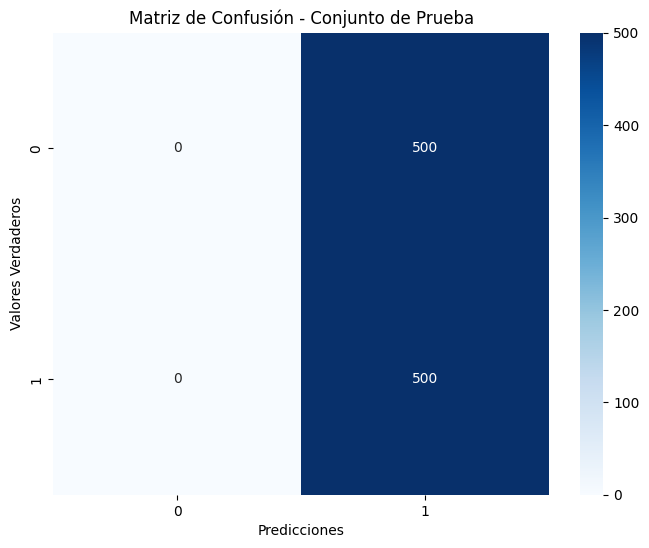

In [ ]:
# Crear la matriz de confusión para el conjunto de validacion
cm_test = confusion_matrix(validation_labels,y_pred_validation)

# Crear el mapa de calor para el conjunto de validacion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, cmap="Blues",fmt='d')
plt.title("Matriz de Confusión - Conjunto de Prueba")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")
plt.show()

<p>Podemos observar como en nuesrto modelo de random forest tambien se presenta el sobre ajuste, vamos a intentar mejorar el modelo para asi evitar dicho problema y encontrar un mejor porcentaje</p>

<hr>

<h4>Prueba 2 usando GridSearch</h4>

In [ ]:
bosque2 = RandomForestClassifier(n_estimators=11)

<p>Descripcion de las variables</p>

<ul>  
  <li> <strong>n_estimators:</strong> Representa el número de árboles de decisión que se van a utilizar en el modelo. </li>
  <li> <strong>start:</strong> Es el valor de inicio para la secuencia de números generada. </li>
  <li> <strong>  stop:</strong>Es el valor final de la secuencia de números generada. </li>
  <li> <strong> num:  </strong>  Es el número de valores que se generarán en la secuencia.</li>
</ul>

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=10, stop=45, num=5)]

max_features = ['auto', 'sqrt']

max_depth = [10,15,20,25]

min_samples_split = [20, 25]

min_samples_leaf = [10, 20]


<p>  Creación de un objeto GridSearchCV y su posterior ajuste utilizando un modelo RandomForestClassifier en conjunto con una cuadrícula de hiperparámetros especificada en param_grid</p>

In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                }
print(param_grid)

{'n_estimators': [10, 18, 27, 36, 45], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 15, 20, 25], 'min_samples_split': [20, 25], 'min_samples_leaf': [10, 20]}


In [ ]:
rf_Grid = GridSearchCV(estimator = bosque2, param_grid = param_grid, cv = 5, n_jobs = -1)

In [ ]:
rf_Grid.fit(df_train, training_labels)

In [ ]:
rf_Grid.best_params_

In [ ]:
#Creamos un nuevo bosque con los parametros encontrados por el GridSearch
bosque2 = RandomForestClassifier(max_depth= None,
 max_features='auto',
 min_samples_leaf= 1,
 min_samples_split= 5,
 n_estimators=400)
#Entrenamos nuestro bosque
bosque2.fit(df_train.values,training_labels.values)

y_pred_validation = bosque2.predict(df_validation)

y_pred_train = bosque2.predict(df_train)
#Evaluamos con los datos de entrenamiento y validacion

validation_accuracy = accuracy_score(y_pred_validation,validation_labels ) * 100

train_accuracy = accuracy_score(y_pred_train,training_labels ) *100

print("Precisión con el conjunto de validacion:", "{:.3f}%".format(validation_accuracy))
print("Precisión del entrenamiento :", "{:.3f}%".format(train_accuracy))


Precisión con el conjunto de validacion: 50.000%
Precisión del entrenamiento : 100.000%


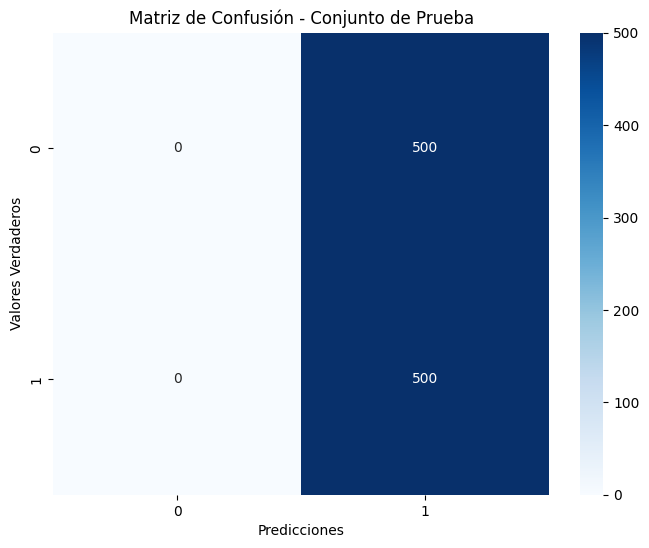

In [ ]:
# Crear la matriz de confusión para el conjunto de validacion
cm_test = confusion_matrix(validation_labels,y_pred_validation)

# Crear el mapa de calor para el conjunto de validacion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, cmap="Blues",fmt='d')
plt.title("Matriz de Confusión - Conjunto de Prueba")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")
plt.show()

<p>Los resultados obtenidos siguen siendo los mismos</p>

<hr>

<h4>Prueba 3 </h4>

In [ ]:
bosque3 = RandomForestClassifier()

<p>
cambiamos los valores de los hiper parametro n_estimators, esta vez inicia en 60 y termina en 125, la cantidad de numeros que contendra nuestro array sera de 9
</p>

In [ ]:

n_estimators = [int(x) for x in np.linspace(start=15, stop=52, num=7)]

max_features = ['auto', 'sqrt',320]

max_depth = [22, 45,83,105]

min_samples_split = [24, 53,35,16]

min_samples_leaf = [10, 20, 26]

In [ ]:
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
}

print(param_grid)

{'n_estimators': [100, 125, 150], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [ ]:
rf_Grid = GridSearchCV(estimator = bosque, param_grid = param_grid, cv = 2, verbose=2, n_jobs = -1)

In [ ]:
rf_Grid.fit(df_train, training_labels)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42), n_jobs=4,
             param_grid={'max_depth': [2, 4], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 125, 150]},
             verbose=2)

In [ ]:
rf_Grid.best_params_

{'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 150}

In [ ]:
#Creamos un nuevo bosque con los parametros encontrados por el GridSearch
bosque3 = RandomForestClassifier(max_depth= 4,
 max_features='auto',
 min_samples_leaf= 1,
 min_samples_split= 5,
 n_estimators=150)
#Entrenamos nuestro bosque
bosque3.fit(df_train.values,training_labels.values)

y_pred_validation = bosque3.predict(df_validation)

y_pred_train = bosque3.predict(df_train)
#Evaluamos con los datos de entrenamiento y validacion

validation_accuracy = accuracy_score(y_pred_validation,validation_labels ) * 100

train_accuracy = accuracy_score(y_pred_train,training_labels ) *100

print("Precisión con el conjunto de validacion:", "{:.3f}%".format(validation_accuracy))
print("Precisión del entrenamiento :", "{:.3f}%".format(train_accuracy))

Precisión con el conjunto de validacion: 50.000%
Precisión del entrenamiento : 89.108%


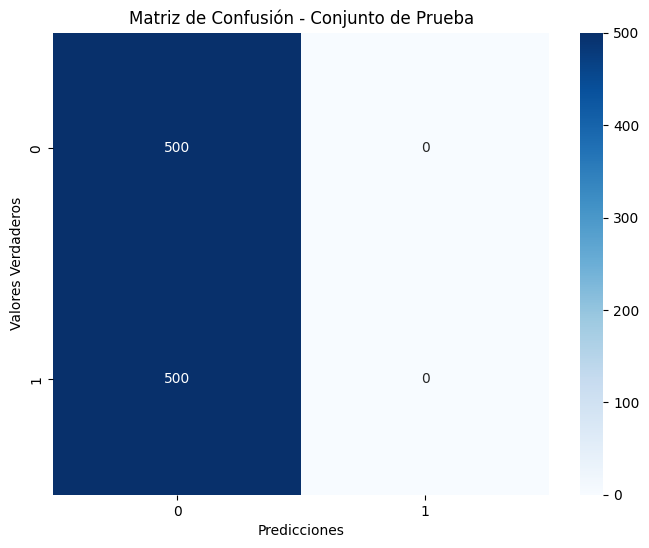

In [ ]:
# Crear la matriz de confusión para el conjunto de validacion
cm_test = confusion_matrix(validation_labels,y_pred_validation)

# Crear el mapa de calor para el conjunto de validacion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, cmap="Blues",fmt='d')
plt.title("Matriz de Confusión - Conjunto de Prueba")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")
plt.show()

<p>Seguimos obteniendo los mismos resultados</p>

<hr>

<h4>Prueba 4</h4>

<p>En esta prueba dejamos de usar GridSearch para establecer manualmente los hiper parametros</p>

<p>Explicacion de las variables:

  <ul>
    <li><strong>n_estimators:</strong>El número de árboles en el bosque. </li>
    <li><strong>criterion</strong> El criterio utilizado para medir la calidad de una división. En este caso, se utiliza "gini", que es el índice Gini, una medida de impureza comúnmente utilizada en árboles de decisión y bosques aleatorios.</li>
    <li><strong>max_features</strong>   El número máximo de características que se deben considerar para dividir un nodo. En este caso, se establece en "sqrt", lo que significa que se considerará la raíz cuadrada del número total de características. Esto es una práctica común y ayuda a reducir la correlación entre los árboles en el bosque.</li>
    <li><strong>bootstrap</strong>Indica si se deben realizar muestras con reemplazo al construir árboles. Si se establece en True, se realiza el muestreo con reemplazo (bootstrapping), lo que significa que se toman muestras del conjunto de datos de entrenamiento con reemplazo.</li>
    <li><strong>max_samples</strong>El número de muestras a extraer de X para ajustar cada estimador. </li>
    <li><strong>oob_score</strong> Indica si se debe calcular el error fuera de la bolsa (out-of-bag) durante el entrenamiento. El error fuera de la bolsa es una estimación del rendimiento del modelo en datos no vistos.</li>
  </ul>



</p>

In [ ]:
bosque_4 =RandomForestClassifier(n_estimators =24,
                                   criterion="gini",
                                   max_features="sqrt",
                                   bootstrap=True,
                                   max_samples=1/5,
                                   oob_score=True)

bosque_4.fit(df_train.values,training_labels.values)


y_pred_validation = bosque_4.predict(df_validation)

y_pred_train = bosque_4.predict(df_train)
#Evaluamos con los datos de entrenamiento y validacion

validation_accuracy = accuracy_score(y_pred_validation,validation_labels ) * 100

train_accuracy = accuracy_score(y_pred_train, training_labels) *100


print("Precisión con el conjunto de validacion:", "{:.3f}%".format(validation_accuracy))
print("Precisión del entrenamiento :", "{:.3f}%".format(train_accuracy))
#print("Error fuera de la bolse",oob_score)


Precisión con el conjunto de validacion: 50.000%
Precisión del entrenamiento : 81.292%


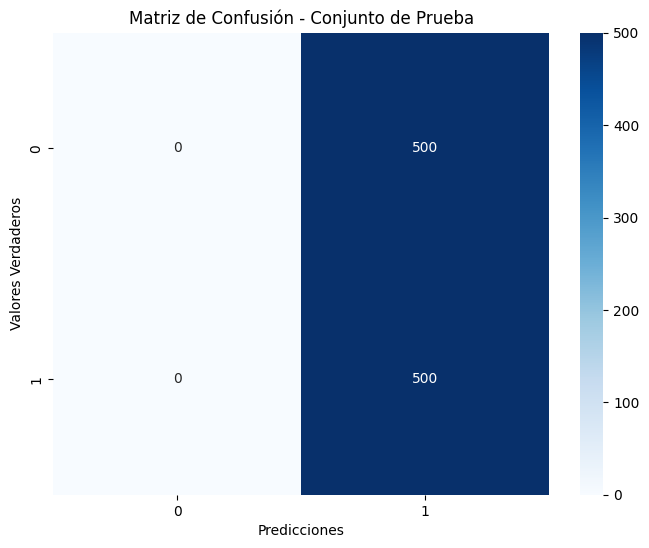

In [ ]:
# Crear la matriz de confusión para el conjunto de validacion
cm_test = confusion_matrix(validation_labels,y_pred_validation)

# Crear el mapa de calor para el conjunto de validacion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, cmap="Blues",fmt='d')
plt.title("Matriz de Confusión - Conjunto de Prueba")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")
plt.show()

<p>Seguimos con los mismos resultados a pesar de haber cambiado el valor de los hiper parametros,el problema del sobre ajuste sigue presente</p>

<hr>

<h3> <strong> Redes Neuronales </strong> 🧠</h3>

<h5>Prueba 1 con parametros por defecto</h5>

In [ ]:
cerebro = MLPClassifier( hidden_layer_sizes=(100), activation = 'relu', solver='adam', alpha=0.0001, learning_rate= 'constant', max_iter = 200)
cerebro.fit(df_train,training_labels)

y_pred_validation = cerebro.predict(df_validation)
y_pred_training= cerebro.predict(df_train)

validation_precision = 100 * accuracy_score(validation_labels, y_pred_validation)
training_precision = 100 * accuracy_score(training_labels, y_pred_training)

print('Precisión con el conjunto de validacion: {0:.3f}%'.format(validation_precision))
print('Precisión con el conjunto de entrenamiento: {0:.3f}%'.format(training_precision))

Precisión con el conjunto de validacion: 50.000%
Precisión con el conjunto de entrenamiento: 100.000%


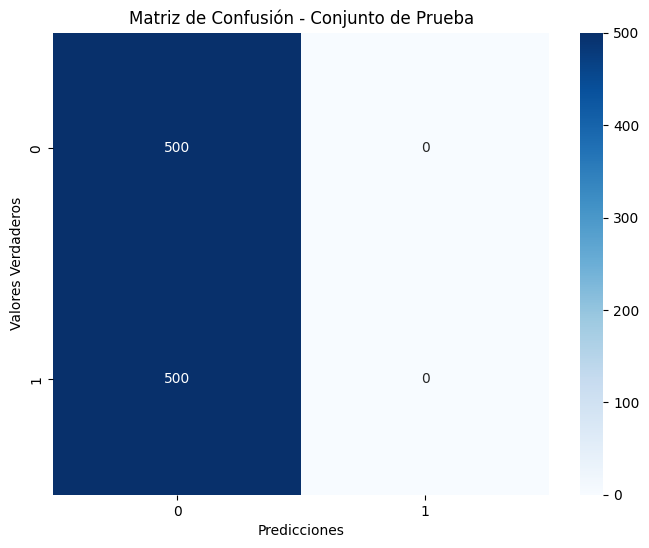

In [ ]:
# Crear la matriz de confusión para el conjunto de prueba
cm_test = confusion_matrix(validation_labels, y_pred_validation)

# Crear el mapa de calor para el conjunto de prueba
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, cmap="Blues",fmt='d')
plt.title("Matriz de Confusión - Conjunto de Prueba")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")
plt.show()

<p>Como podemos observar seguimos teniendo el problema del sobre ajuste, vamos a alterar los hiper parametros para buscar solucionar este problema que se ha hecho presente en todos nuestros modelos</p>

<hr>

<h4>Prueba 2 usando GridSearch</h4>

<p>
  <ul>
    <li><strong>hidden_layer_sizes: </strong>Este parámetro especifica la arquitectura de la red neuronal, es decir, la cantidad y el tamaño de las capas ocultas, en este caso tenemos una red neuronal con una capa oculta que tiene 500 neuronas y una red neuronal con dos capas ocultas, la primera con 700 neuronas y la segunda con 500 neuronas.</li>
    <li><strong>max_iter: </strong>  Este parámetro especifica el número máximo de iteraciones (épocas) para las cuales el modelo entrenará los datos.</li>
  </ul>
</p>

In [ ]:

param_grid = {
    'hidden_layer_sizes': [(500),(700,500)],
    'max_iter': [15,20],
}

grid = GridSearchCV(MLPClassifier(random_state=42), param_grid=param_grid, cv=2)
grid.fit(df_train,training_labels)
print(grid.best_params_)

{'hidden_layer_sizes': (700, 500), 'max_iter': 15}


In [ ]:
cerebro2 = MLPClassifier( hidden_layer_sizes= (700, 500), max_iter= 15)
cerebro2.fit(df_train,training_labels)

y_pred_validation = cerebro2.predict(df_validation)
y_pred_training= cerebro2.predict(df_train)

validation_precision = 100 * accuracy_score(validation_labels, y_pred_validation)
training_precision = 100 * accuracy_score(training_labels, y_pred_training)

print('Precisión con el conjunto de validacion: {0:.3f}%'.format(validation_precision))
print('Precisión con el conjunto de entrenamiento: {0:.3f}%'.format(training_precision))

Precisión con el conjunto de validacion: 50.000%
Precisión con el conjunto de entrenamiento: 100.000%


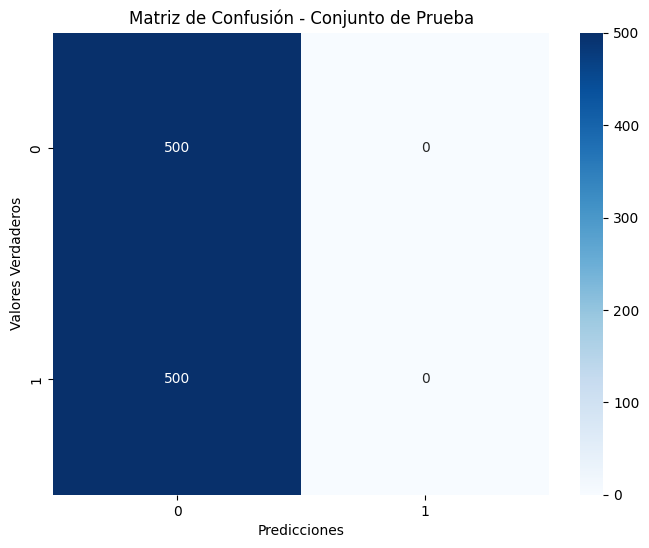

In [ ]:
# Crear la matriz de confusión para el conjunto de validacion
cm_test = confusion_matrix(validation_labels, y_pred_validation)

# Crear el mapa de calor para el conjunto de validacion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, cmap="Blues",fmt='d')
plt.title("Matriz de Confusión - Conjunto de Prueba")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")
plt.show()

<p>A pesar de haber alterado hiper parametros, seguimos obteniendo los mismos resultados, no logramos solucionar el problema del sobre ajuste hasta el momento</p>

<hr>

<h5>Prueba 3</h5>

<p> usamos time de la libreria time y su metodo .time() para sabes cuanto tiempo dura nuestro modelo en hacer el entrenamiento esta vez, pasamos de usar GridSearch por la demanda computacional que exige y configuramos los hiper parametros manualmente esta vez, esta prueba tendra una capa con 3000 mil neuronas y el numero de iteraciones sera de 60</p>

In [ ]:
start_time = time.time()
cerebro_3 = MLPClassifier( hidden_layer_sizes=(3000),  max_iter = 60, alpha=0.5)
cerebro_3.fit(df_train,training_labels)

y_pred_validation = cerebro_3.predict(df_validation)
y_pred_training = cerebro_3.predict(df_train)


train_accuracy = accuracy_score(y_pred_training, training_labels) * 100
validation_accuracy = accuracy_score(y_pred_validation,validation_labels) * 100

end_time = time.time()
elapsed_time = end_time - start_time

print("Precisión con el conjunto de entrenamiento: {:.3f}%".format(train_accuracy))
print("Precisión con el conjunto de validacion: {:.3f}%".format(validation_accuracy))
print("Tiempo de ejecución: {:.3f} segundos".format(elapsed_time))

Precisión con el conjunto de entrenamiento: 50.046%
Precisión con el conjunto de validacion: 50.000%
Tiempo de ejecución: 391.561 segundos


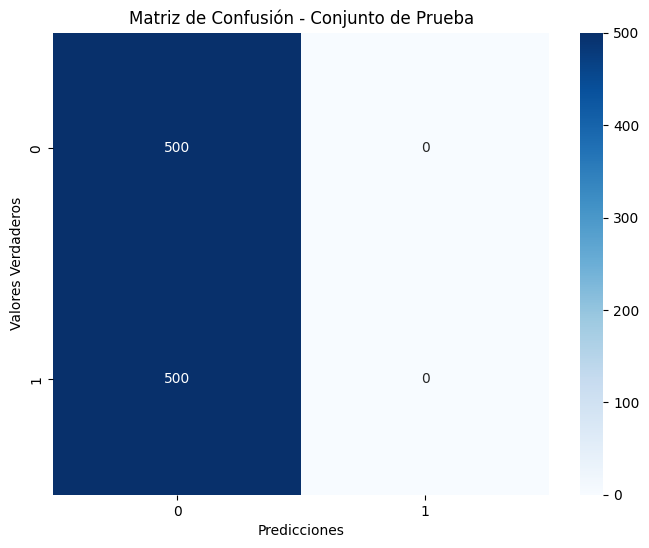

In [ ]:
# Crear la matriz de confusión para el conjunto de validacion
cm_test = confusion_matrix(validation_labels,y_pred_validation)

# Crear el mapa de calor para el conjunto de validacion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, cmap="Blues",fmt='d')
plt.title("Matriz de Confusión - Conjunto de Prueba")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")
plt.show()

<p>Seguimos con los mismos resultados</p>

<hr>

<h3>Deep Learning Keras 🦾</h3>

<h5>Prueba 1</h5>

<p>En este apartado de deep learning primero vamos a usar los valores por defecto, como siempre hemos hecho en este notebook cuando se trata de la primera prueba y no vamos a usar GridSearch esta vez, los hiper parametros seran configurados manualmente</p>

<p>Definimos una funcion en donde se va crear nuestro modelos de redes neuronales profundas, nuestro primer modelo tendra 3 capas, una de entrada, una de salida y una capa oculta.

la primera capa tiene 6500 neuronas porque coincide con el numero de instanciasde nuestro conjunto de datos de entrenamiento, la capa de salida usa la funcion de activacion "sigmod" porque la activación sigmoide se utiliza comúnmente en problemas de clasificación binaria, ya que produce una salida en el rango [0, 1], que se interpreta como la probabilidad de pertenecer a la clase positiva.

<ul>
  <li>  <strong> loss="binary_crossentropy":</strong> La función de pérdida utilizada para evaluar qué tan bien el modelo está aprendiendo. En este caso, se utiliza la entropía cruzada binaria, comúnmente utilizada en problemas de clasificación binaria.</li>
  <li><strong>optimizer='adam': </strong>   El optimizador utilizado para ajustar los pesos del modelo durante el entrenamiento. Adam es un optimizador popular.</li>

  <li><strong>metrics=["accuracy"]</strong> La métrica utilizada para evaluar el rendimiento del modelo durante el entrenamiento y la evaluación. En este caso, se utiliza la precisión (accuracy).</li>

</ul>
</p>

In [ ]:
def create_model():
    model = keras.models.Sequential([
        keras.layers.Dense(6500, activation='relu' ),
        keras.layers.Dense(100, activation='relu' ),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    return model

# Crear el objeto KerasClassifier
keras_classifier = KerasClassifier(build_fn=create_model)

# Obtener el modelo entrenado
#keras_classifier.fit(df_train,training_labels)

# Realizar predicciones en los datos de validacion
#y_pred = best_model.predict(df_validation)

In [ ]:
score_validation = accuracy_score(validation_labels,y_pred);

<hr>

<h5>Prueba 2</h5>

<p>En esta prubea establecemos la primera capa con 2000 neuronas, la cantidad de variables de entrada sera igual al numero de columnas de nuestro conjunto de datos de entrenamiento </p>

In [ ]:
def create_model():
    model = keras.models.Sequential([
        keras.layers.Dense(2000, activation='relu', input_shape=( df_train.shape[1],)),
        keras.layers.Dense(3200, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    return model

# Crear el objeto KerasClassifier
keras_classifier = KerasClassifier(build_fn=create_model)

# Obtener el modelo entrenado
best_model = keras_classifier.fit(df_train,training_labels)

# Realizar predicciones en los datos de validacion
y_pred = best_model.predict(df_validation)

32/32 [==============================] - 1s 21ms/step


<p>Podemos oservar como el resultado sigue siendo el mismo que los demas modelos de ML que hemos estado probando en este trabajo</p>

<hr>

<h1>CONCLUSIONES</h1>

<p>

En este análisis comparativo, hemos evaluado el rendimiento de diferentes modelos de aprendizaje de máquina (Árboles de Decisión, Random Forest y Redes Neuronales) los modelos han sido ajustados usando hiperparametros y tambien la libreria de GridSearch y tambien se le ha aplicado a los datos la reduccion de caracteristicas por PCA


Durante el desarrolo de este trabajo se busco usar las mejores practicas del analisis de datos y al mismo nos pudimos enriquecer nuestro conocimiento de los diferentes autores que investigamos para poder manejar nuestros datos de la mejor manera

En cuanto a la demanda computacional,random forest fue sin el modelo de ML que mas se tardo en entrenar sobre todo la prubea numero 2 en donde se usa GridSearch que llego a estar mas de una hora entrenando, decidimos pasar de ella y seguir con los otros modelos, no pudimos solucionar el problema del sobre ajuste de los modelos a pesar de haber intentado con diferentes valores de hiper parametros, nuestros modelos solo muestran un buen score con los datos de entrenamiento pero con otros datos falla totalmente, quedara para el futuro buscar una mejor solucion.


</p>



<h1>PROYECIONES A FUTURO</h1>

<p>Para el trabajo futuro buscaremos cual seria la mejor manera de resolverl el problema del sobre ajuste, el cual afecto bastante a nuestros modelos de aprendizaje automatico, ademas investigar mejores estrategias para implementar los codigos de ML cuando se trata de un problema de clasificacion</p>

<h1>Bibliografia</h1>
<ul>


  <li>https://keras.io/guides/sequential_model/</li>
  <li>  https://stackoverflow.com/questions/72866841/how-to-calculate-loss-with-kerasclassifier</li>
  <li> https://www.tensorflow.org/guide/keras?hl=es-419 </li>
  <li>  https://www.youtube.com/watch?v=iX_on3VxZzk&t=846s</li>
  <li>  https://www.youtube.com/watch?v=dkhXGTersP0</li>
  <li>  https://www.youtube.com/watch?v=cDMoaMnbQUc</li>
  <li> https://www.youtube.com/watch?v=2J90FG6QKL4&t=616s </li>
  <li> https://www.youtube.com/watch?v=yOCJQLf_YFI </li>
  <li> https://www.youtube.com/watch?v=z5rmY-LV7ME&t=1908s </li>
  <li>  https://www.youtube.com/watch?v=k3CWA2GBb8o&t=139s</li>
  <li>  https://www.youtube.com/watch?v=7My_PBhxeP4&t=1321s</li>
  <li>  https://www.youtube.com/watch?v=s_Juv3vX9bo&t=663s</li>
  <li>  https://www.youtube.com/watch?v=vdYzm4xC7mc</li>
  <li>  https://www.youtube.com/watch?v=-VuR14Qyl7E</li>
  <li> https://www.youtube.com/watch?v=x-7BHjMA15M </li>
  <li> https://www.youtube.com/watch?v=uaGMk43XTOw</li>
  <li>https://www.youtube.com/watch?v=cJoGNNHGlaw</li>
</ul>

<p>Trabajo de implementacion realizado por:<br>
<strong>Santiago de jesus foronda valverde</strong><br>
</p>